<a href="https://colab.research.google.com/github/mausoleo/rede_neural_convolucinal/blob/main/rede_neural_convolucional_definitivo_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [ ]:
# Função para carregar imagens e máscaras
def load_images_and_masks(image_dir, mask_dir):
    images = []
    masks = []

    # Lista os arquivos em cada diretório
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".png")])
    mask_files = sorted([f for f in os.listdir(mask_dir) if f.endswith(".png")])

    # Verifica se o número de arquivos é o mesmo
    if len(image_files) != len(mask_files):
        raise ValueError("O número de imagens e máscaras não é o mesmo.")

    # Itera sobre os arquivos com base na ordem
    for img_file, mask_file in zip(image_files, mask_files):
        # Carrega a imagem
        img_path = os.path.join(image_dir, img_file)
        image = load_img(img_path, target_size=(256, 256)) # Redimensione conforme necessário
        image = img_to_array(image) / 255.0 # Normaliza a imagem
        images.append(image)

        # Carrega a máscara
        mask_path = os.path.join(mask_dir, mask_file)
        mask = load_img(mask_path, target_size=(256, 256), color_mode='grayscale')
        mask = img_to_array(mask) / 255.0 # Normaliza a máscara
        masks.append(mask)

    return np.array(images), np.array(masks)

In [ ]:
# Carrega os dados
image_dir = '/content/content/cidades_v2'
mask_dir = '/content/content/mascaras'
images, masks = load_images_and_masks(image_dir, mask_dir)

In [ ]:
# Dividir em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(images, masks, test_size=0.2, random_state=42)

In [ ]:
def unet_model(input_size=(256, 256, 3)):
    inputs = tf.keras.Input(shape=input_size)  # Camada de entrada corrigida

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
# Inicializa o modelo
model = unet_model()

In [ ]:
# Compila o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Treinamento do modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=8)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 126s 12s/step - accuracy: 0.2802 - loss: 0.6900 - val_accuracy: 0.4149 - val_loss: 0.6599
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 141s 12s/step - accuracy: 0.4106 - loss: 0.6629 - val_accuracy: 0.4149 - val_loss: 0.6522
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 149s 13s/step - accuracy: 0.3979 - loss: 0.6524 - val_accuracy: 0.4149 - val_loss: 0.6356
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 134s 12s/step - accuracy: 0.4044 - loss: 0.6401 - val_accuracy: 0.4149 - val_loss: 0.6332
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 12s/step - accuracy: 0.4011 - loss: 0.6271 - val_accuracy: 0.4149 - val_loss: 0.5810
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 142s 12s/step - accuracy: 0.4298 - loss: 0.5524 - val_accuracy: 0.4090 - val_loss: 0.5486
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 149s 13s/step - accuracy: 0.4318 - loss: 0.5292 - val_accuracy: 0.4215 - val_loss: 0.5163
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 135s 12s/step - accuracy: 0.4319 - loss: 0.4980 - val_accuracy: 0.

In [ ]:
# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Perda: {loss:.4f}, Acurácia: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4730 - loss: 0.3739
Perda: 0.3739, Acurácia: 0.4730


In [ ]:
# Função para aplicar o modelo em uma nova imagem
def predict_image(model, image_path):
    # Carrega a imagem original e salva o tamanho original
    original_image = Image.open(image_path)
    original_size = original_image.size  # Tamanho original (largura, altura)

    # Pré-processa a imagem para o modelo
    image = load_img(image_path, target_size=(256, 256))
    image = img_to_array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Adiciona dimensão de batch

    # Faz a predição
    prediction = model.predict(image)
    prediction = np.squeeze(prediction)  # Remove a dimensão extra

    # Redimensiona a máscara predita para o tamanho original
    prediction_resized = Image.fromarray((prediction * 255).astype(np.uint8))  # Converte para imagem PIL
    prediction_resized = prediction_resized.resize(original_size, Image.BILINEAR)  # Redimensiona

    return np.array(prediction_resized) / 255.0  # Retorna como array normalizado

In [ ]:
# Aplicando o modelo em uma nova imagem
new_image_path = '/content/leme_2025.png'
predicted_mask = predict_image(model, new_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


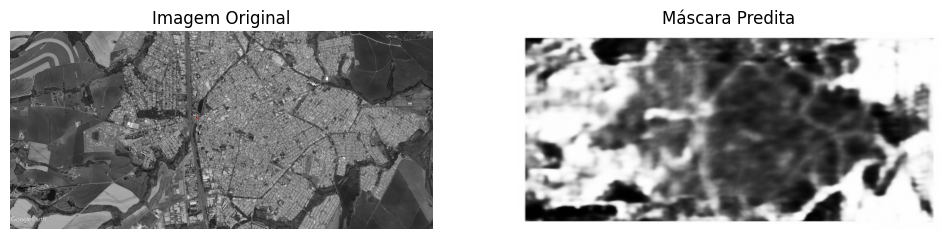

In [ ]:
# Exibindo a imagem original e a máscara predita
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(load_img(new_image_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Máscara Predita")
plt.imshow(predicted_mask, cmap='gray')
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 752ms/step


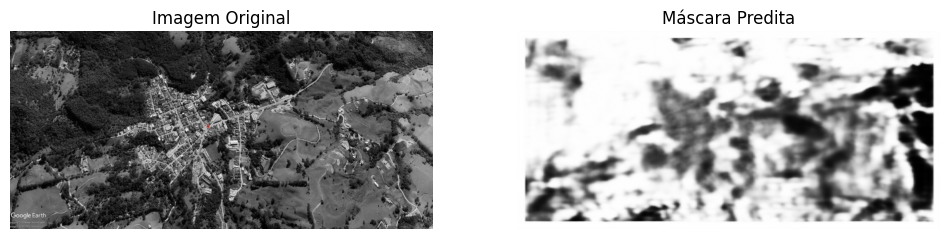

In [ ]:
# Aplicando o modelo em uma nova imagem
new_image_path = '/content/goncalves_2025.png'
predicted_mask = predict_image(model, new_image_path)

# Exibindo a imagem original e a máscara predita
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(load_img(new_image_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Máscara Predita")
plt.imshow(predicted_mask, cmap='gray')
plt.axis("off")

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


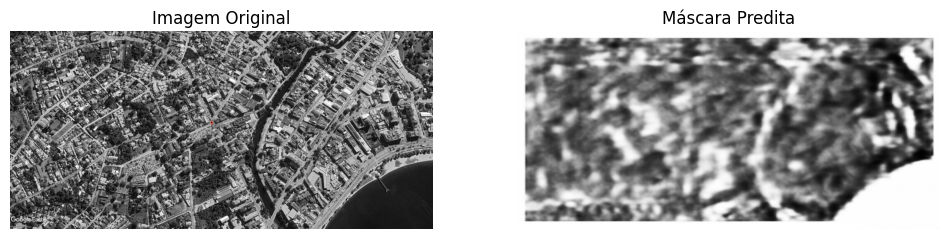

In [ ]:
# Aplicando o modelo em uma nova imagem
new_image_path = '/content/araruama_2025.png'
predicted_mask = predict_image(model, new_image_path)

# Exibindo a imagem original e a máscara predita
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Imagem Original")
plt.imshow(load_img(new_image_path))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Máscara Predita")
plt.imshow(predicted_mask, cmap='gray')
plt.axis("off")

plt.show()